# EDA -- REVIEWS DE YELP

COMIENZO A ANALIZAR EL REVIEWS DE YELP

In [9]:
import ast
import json
import pandas as pd
import numpy as np
import jsonlines
import matplotlib.pyplot as plt
from wordcloud import WordCloud

Cargo el dataset

In [3]:
data = []
with jsonlines.open('data/Yelp/review.json') as reader:
    for obj in reader:
        data.append(obj)

df_review = pd.DataFrame(data)
df_review 

FileNotFoundError: [Errno 2] No such file or directory: 'data/Yelp/review.json'

Quiero ver valores faltantes y columnas

In [4]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   review_id    object 
 1   user_id      object 
 2   business_id  object 
 3   stars        float64
 4   useful       int64  
 5   funny        int64  
 6   cool         int64  
 7   text         object 
 8   date         object 
dtypes: float64(1), int64(3), object(5)
memory usage: 480.0+ MB


Aca veo los tipos de datos presentes

In [5]:
df_review.isna().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

Podemos ver que no hay ningun valor faltante ni valores nulos.

Quiero los valores unicos de Stars

In [6]:
df_review['stars'].unique()

array([3., 5., 4., 1., 2.])

# Gráficos

Analizamos algunas muestras

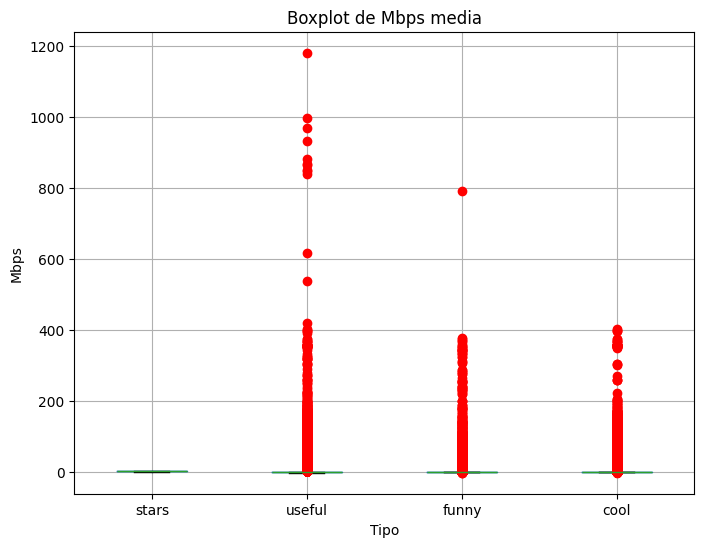

In [9]:

plt.figure(figsize=(8,6))
df_review.boxplot(column=['stars','useful','funny','cool'], sym='ro')
plt.title('Boxplot de Mbps media')
plt.xlabel('Tipo')
plt.ylabel('Mbps')

plt.show()

Existen muchas cantidad de outliers en la columna 'useful', 'funny' y 'cool' . La columna Stars esta con parametros correctos. 

Nube de palabras

In [11]:
# Tomar las primeras 1000 filas de la columna 'text'
df_review_subset = df_review.head(10000)

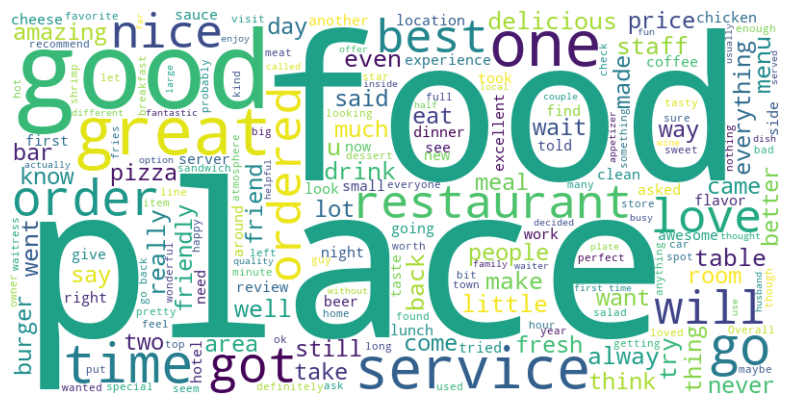

In [12]:
text = " ".join(review for review in df_review_subset.text)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
ruta = 'data/Yelp/review.json'

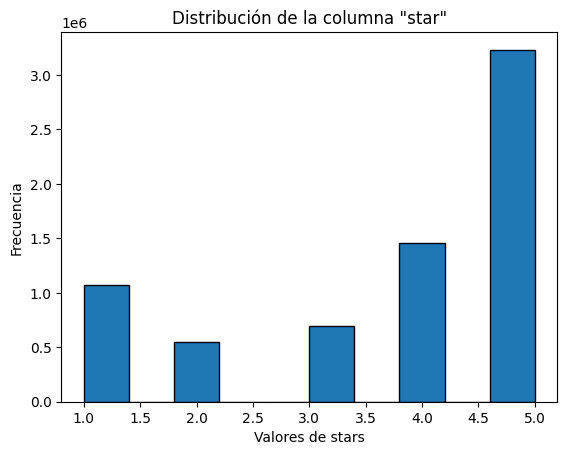

In [14]:
tam_muestra = 1000
muestra = pd.read_json(r'data/Yelp/review.json',
                      lines=True, chunksize=tam_muestra)

valores = []

for valor in muestra:
    
    valores_uso = valor['stars']
    
    valores.extend(valores_uso)


plt.hist(valores, bins=10, edgecolor='black')
plt.xlabel('Valores de stars')
plt.ylabel('Frecuencia')
plt.title('Distribución de la columna "star"')
plt.show()


Se ve una tendencia de mayor frecuencia de puntuaciones por encima de 3.5 en las reseñas.
La mayoría de las experiencias de los usuarios son positivas. Vemos que los usuarios tienden a calificar favorablemente los negocios que están revisando.



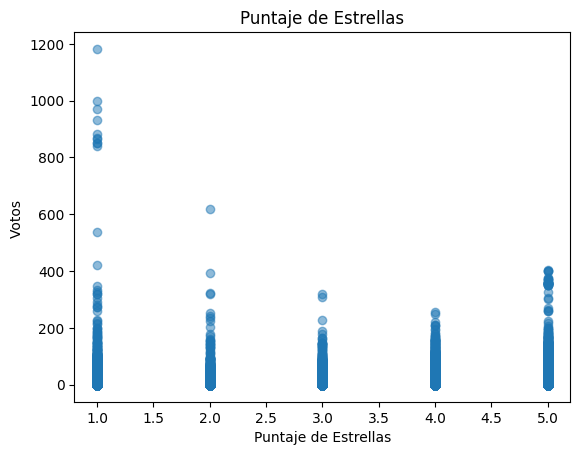

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


tam_muestra = 10000
muestra = pd.read_json(r'data/Yelp/review.json',
                      lines=True, chunksize=tam_muestra)

useful_list = []
stars_list = []


for data_block in muestra:
    useful_list.extend(data_block['useful'])
    stars_list.extend(data_block['stars'])


plt.scatter(stars_list, useful_list, alpha=0.5)
plt.xlabel('Puntaje de Estrellas')
plt.ylabel('Votos ')
plt.title('Puntaje de Estrellas')
plt.show()

En este gráfico queda en evidencia que con las estrellas con valores mas bajos hay mas interaccion,  siendo este review muy calificado como 'useful' por otros usuarios.


# Datasets TIP


Tips (consejos) escritos por el usuario. Los tips son más cortas que las reseñas y tienden a dar sugerencias rápidas.

In [4]:
data = []

# Leer el archivo JSON Lines
with jsonlines.open(r'D:\Denise_Estudio\henry\Proyecto final\data\Yelp\tip.json') as reader:
    for obj in reader:
        data.append(obj)

# Convertir la lista de objetos JSON en un DataFrame
df_tips = pd.DataFrame(data)
df_tips

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0
...,...,...,...,...,...
908910,eYodOTF8pkqKPzHkcxZs-Q,3lHTewuKFt5IImbXJoFeDQ,Disappointed in one of your managers.,2021-09-11 19:18:57,0
908911,1uxtQAuJ2T5Xwa_wp7kUnA,OaGf0Dp56ARhQwIDT90w_g,Great food and service.,2021-10-30 11:54:36,0
908912,v48Spe6WEpqehsF2xQADpg,hYnMeAO77RGyTtIzUSKYzQ,Love their Cubans!!,2021-11-05 13:18:56,0
908913,ckqKGM2hl7I9Chp5IpAhkw,s2eyoTuJrcP7I_XyjdhUHQ,Great pizza great price,2021-11-20 16:11:44,0


Se revisan algunas columas, tipos de datos y nulos

In [5]:
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908915 entries, 0 to 908914
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           908915 non-null  object
 1   business_id       908915 non-null  object
 2   text              908915 non-null  object
 3   date              908915 non-null  object
 4   compliment_count  908915 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 34.7+ MB


In [6]:
df_tips.isna().sum()

user_id             0
business_id         0
text                0
date                0
compliment_count    0
dtype: int64

Podemos notar que no hay presencia de valos nulos

# Gráficos

Comencemos a analizar con una nube de palabras sobre una muestra de 10000 filas cuales se repiten más

In [7]:
muestra_tip = df_tips.head(10000)

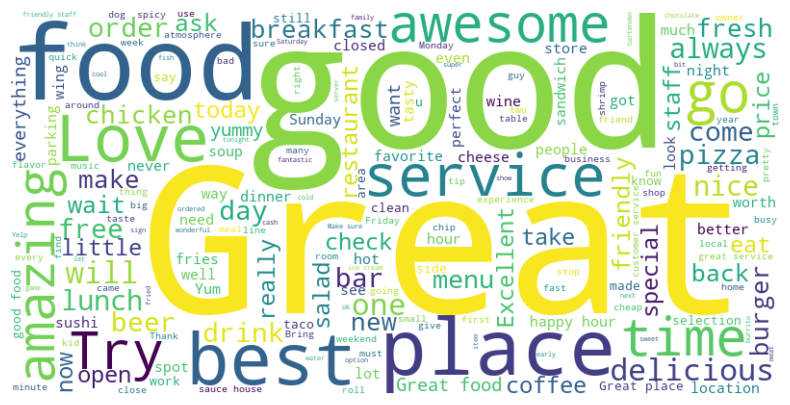

In [10]:

text = " ".join(review for review in muestra_tip.text)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Se puede observar que parece existir una tendencia a dejar comentarios buenos y favorables, dado que resaltan palabras como 'great', 'best' ,'good'.

Intentemos con un filtro, por ejemplo donde aparezca la palabra 'food'

In [13]:
filtro = df_tips[df_tips['text'].str.contains('food', case=False)]

muestra2_tip = filtro.head(10000)

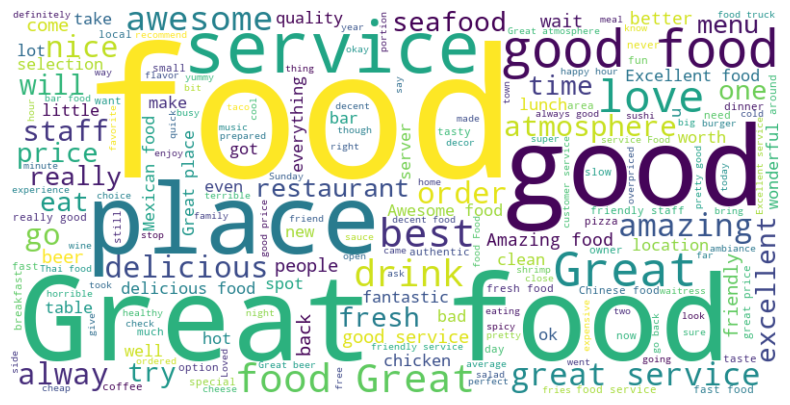

In [14]:
text2 = " ".join(review for review in muestra2_tip.text)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text2)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Al tomar una muiestra luego de un filtro, podemos ver que existen palabras favorables relacionados con el ambito gastronómico. Podemos observar palabras y frases mas asociadas como 'great food', 'good' , 'great service'. Por lo que se deduce que existen más comentarios favorables que quejas, al menos en este datasets TIPS.


# Dataset check in

Creo dataframe

In [16]:
data = []

# Leer el archivo JSON Lines
with jsonlines.open('D:\Denise_Estudio\henry\Proyecto final\data\Yelp\checkin.json') as reader:
    for obj in reader:
        data.append(obj)

df_check = pd.DataFrame(data)
df_check

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."
...,...,...
131925,zznJox6-nmXlGYNWgTDwQQ,"2013-03-23 16:22:47, 2013-04-07 02:03:12, 2013..."
131926,zznZqH9CiAznbkV6fXyHWA,2021-06-12 01:16:12
131927,zzu6_r3DxBJuXcjnOYVdTw,"2011-05-24 01:35:13, 2012-01-01 23:44:33, 2012..."
131928,zzw66H6hVjXQEt0Js3Mo4A,"2016-12-03 23:33:26, 2018-12-02 19:08:45"


Revisamos columnas, tipos de datos, nulos 

In [17]:
df_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131930 entries, 0 to 131929
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  131930 non-null  object
 1   date         131930 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


No hay presencia de nulos

Además podemos ver de este dataset que conotiene la informacion referida a cada negocio asociado por su id, y fechas de registros o cambios que se generen dentro de la plataforma, lo cual no consideramos que sea relevante para nuestra propuesta.

# Dataset business

Contiene información del comercio, incluyendo localización, atributos y categorías.

Se crea el dataframe

In [19]:
df_business = pd.read_pickle(r'D:\Denise_Estudio\henry\Proyecto final\data\Yelp\business.pkl')

Se busca informacion sobre las columnas, variables y valores nulos

In [25]:
df_business

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,IN,T6J 5H2,53.468419,-113.492054,3.0,13,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas","{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3..."
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,DE,37204,36.115118,-86.766925,4.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3..."
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,AB,46250,39.908707,-86.065088,3.5,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Shopping, Jewelry, Piercing, Toy Stores, Beaut...",None
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,AB,62025,38.782351,-89.950558,4.0,24,1,"{'BusinessParking': '{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."


In [20]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150346 entries, 0 to 150345
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
 14  business_id   5 non-null       object
 15  name          5 non-null       object
 16  address       5 non-null       object
 17  city          5 non-null       object
 18  state         5 non-null     

In [22]:
df_business.isna().sum()

business_id          0
name                 0
address              0
city                 0
state                3
postal_code          0
latitude             0
longitude            0
stars                0
review_count         0
is_open              0
attributes       13744
categories         103
hours            23223
business_id     150341
name            150341
address         150341
city            150341
state           150341
postal_code     150341
latitude        150341
longitude       150341
stars           150341
review_count    150341
is_open         150341
attributes      150341
categories      150341
hours           150341
dtype: int64

Se observa que hay columnas repetidas, las cuales tienen demasiados nulos, dado que hablamos de gran porcentaje opto por borrarlas ya que no podran brindar informacion útil


In [23]:
df_business = df_business.loc[:, ~df_business.columns.duplicated()]
df_business

In [27]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
dtypes: object(14)
memory usage: 17.2+ MB


Busco valores duplicados revisando id

In [35]:
duplicates = df_business.duplicated(subset=['business_id'], keep=False)
duplicate_ids = df_business[duplicates]['business_id'].unique()
duplicate_ids


array([], dtype=object)

No se encuentran valores duplicados

In [ ]:
df_business.isna().sum()

In [36]:
df_business.describe()

Analicemos por estados, que valores hay y en cuales hay mayores frecuencias

In [31]:
unique_states = df_business['state'].nunique()
unique_states

27

In [33]:
df_business['state'].value_counts()


state
PA     34039
FL     26329
TN     12056
IN     11246
MO     10913
LA      9924
AZ      9912
NJ      8536
NV      7715
AB      5573
CA      5203
ID      4467
DE      2265
IL      2144
TX         4
CO         3
HI         2
MA         2
WA         2
UT         1
NC         1
MI         1
MT         1
SD         1
XMS        1
VI         1
VT         1
Name: count, dtype: int64